PART 1 KALMAN FILTER 

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


In [89]:
data_frame = pd.read_csv('D:\Innopolis courses\Sensation and Perception\Assignements\Assignement 2\Homework02_dataset\Task01\case4.csv')

In [97]:
data_frame


,x,y
0,0.004,347.6700
1,0.008,297.5300
2,0.012,241.5800
3,0.016,294.2000
4,0.020,176.2400
5,0.024,264.3600
6,0.028,305.9800
7,0.032,302.2600
8,0.036,314.1200
9,0.040,346.5700


In [98]:
data_frame.columns=['x', 'y']
print(data_frame)

           x         y
0      0.004  347.6700
1      0.008  297.5300
2      0.012  241.5800
3      0.016  294.2000
4      0.020  176.2400
5      0.024  264.3600
6      0.028  305.9800
7      0.032  302.2600
8      0.036  314.1200
9      0.040  346.5700
10     0.044  275.9400
11     0.048  288.7200
12     0.052  275.7200
13     0.056  224.1300
14     0.060  279.0800
15     0.064  345.9200
16     0.068  233.7600
17     0.072  175.8800
18     0.076  295.8500
19     0.080  339.5600
20     0.084  203.0700
21     0.088  145.1100
22     0.092  208.1000
23     0.096   82.7730
24     0.100  250.3000
25     0.104  353.5800
26     0.108  214.1800
27     0.112  325.9000
28     0.116   83.3960
29     0.120  256.7000
...      ...       ...
6469  25.880   84.7060
6470  25.884  109.6900
6471  25.888  146.8500
6472  25.892   14.1540
6473  25.896  176.5300
6474  25.900  124.7400
6475  25.904  192.1500
6476  25.908  221.0100
6477  25.912  134.9800
6478  25.916   61.5150
6479  25.920   86.9760
6480  25.92

Text(0.5,1,'dataset')

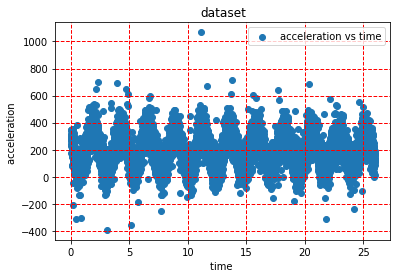

In [99]:
fig = plt.figure() 
plt.scatter(data_frame.x, data_frame.y, label='acceleration vs time')
plt.xlabel("time ")
plt.ylabel("acceleration ")
plt.grid(color='r', linestyle='--', linewidth=1)
plt.legend()
plt.title('dataset')

In [101]:
def kalman (data):
    
    x=data_frame.y
    sigmaEta=x.std()
    sigmaPsi=1
    
    x_opt=[]
    x_opt.append(x[0])
    
    e_opt=[]    
    e_opt.append(sigmaEta)
    
    K=[]
    K.append(1)
    
    for t in range (x.size-1):
        e_opt.append(math.sqrt( (sigmaEta**2 *(e_opt[t]**2 +sigmaPsi**2) ) / (sigmaEta**2 + e_opt[t]**2 + sigmaPsi**2) )  )
        K.append(e_opt[t+1]**2/sigmaEta**2)    
        x_opt.append(K[t+1]*x[t+1]  + (1-K[t+1])*x_opt[t])
        
    return x_opt   

In [102]:
x_opt=kalman(data_frame)


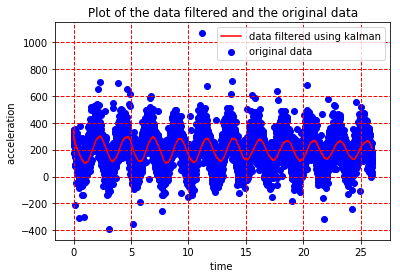

In [104]:
fig = plt.figure() 
plt.plot(data_frame.x, x_opt, label='data filtered using kalman', c='r')
plt.scatter(data_frame.x, data_frame.y,label='original data', c='b')

plt.xlabel("time ")
plt.ylabel("acceleration ")
plt.grid(color='r', linestyle='--', linewidth=1)
plt.title("Plot of the data filtered and the original data")
plt.legend()


Part 2 CAMERA CALIBRATION

In [1]:
import numpy as np
import cv2 as cv
import glob

# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('*.png')
for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (7,6), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)
        # Draw and display the corners
        cv.drawChessboardCorners(img, (7,6), corners2, ret)
        cv.imshow('img', img)
        cv.waitKey(500)

cv.destroyAllWindows()

Now we can do the calibration  

In [5]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
#print(ret)
#print(mtx)
#print(rvecs)
#print(tvecs)
print(dist)

[[-3.14846084e-02 -3.69170178e+00 -8.99794964e-03 -1.12419665e-02
   2.03444754e+01]]


In [70]:
# Calculates Rotation Matrix given euler angles.
def eulerAnglesToRotationMatrix(theta) :
     
    R_x = np.array([[1,         0,                  0                   ],
                    [0,         math.cos(theta[0]), -math.sin(theta[0]) ],
                    [0,         math.sin(theta[0]), math.cos(theta[0])  ]
                    ])
         
         
                     
    R_y = np.array([[math.cos(theta[1]),    0,      math.sin(theta[1])  ],
                    [0,                     1,      0                   ],
                    [-math.sin(theta[1]),   0,      math.cos(theta[1])  ]
                    ])
                 
    R_z = np.array([[math.cos(theta[2]),    -math.sin(theta[2]),    0],
                    [math.sin(theta[2]),    math.cos(theta[2]),     0],
                    [0,                     0,                      1]
                    ])
                     
                     
    R = np.dot(R_z, np.dot( R_y, R_x ))
 
    return R

In [79]:
import math
theta=[-0.56733648,  0.1758901, 3.03507332]
eulerAnglesToRotationMatrix(theta)

array([[-0.9789908 ,  0.00383985, -0.20386826],
       [ 0.10467765, -0.848553  , -0.51865248],
       [-0.17498457, -0.52909646,  0.83032364]])

44.192195376